# Project no. 217

In [97]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import geometric_mean_score
import warnings
warnings.filterwarnings('ignore')

In [98]:
Data = pd.read_csv("myocardial infarction complications.csv")
Data.head()

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  
1         0    0       0          0       0  
2         0    0       0          0       0  
3         0    1       0          0       0  
4         0    0       0          0       0  

[5 rows x 124 columns]

In [99]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [100]:
pd.set_option('display.max_colwidth', None, 'display.max_rows', None)
print(Data.describe().T)

                count        mean         std     min     25%     50%  \
ID             1700.0  850.500000  490.892045    1.00  425.75  850.50   
AGE            1692.0   61.856974   11.259936   26.00   54.00   63.00   
SEX            1700.0    0.626471    0.483883    0.00    0.00    1.00   
INF_ANAM       1696.0    0.554835    0.836801    0.00    0.00    0.00   
STENOK_AN      1594.0    2.316186    2.440586    0.00    0.00    1.00   
FK_STENOK      1627.0    1.205286    1.040814    0.00    0.00    2.00   
IBS_POST       1649.0    1.160703    0.801400    0.00    0.00    1.00   
IBS_NASL         72.0    0.375000    0.487520    0.00    0.00    0.00   
GB             1691.0    1.393258    1.088803    0.00    0.00    2.00   
SIM_GIPERT     1692.0    0.033688    0.180478    0.00    0.00    0.00   
DLIT_AG        1452.0    3.340220    3.098646    0.00    0.00    3.00   
ZSN_A          1646.0    0.194411    0.658722    0.00    0.00    0.00   
nr_11          1679.0    0.025015    0.156217    0.

In [101]:
print(list(Data.columns))

['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_te

# renaming the columns and dividing the dataset in 10 dataframes for EDA
**the data is divided in 10 subsets for getting readable heatmaps and pairplots only. for example strong dependency was observed between the systolic and diastolic blood pressure readings in the heatmap for dataframe1 (df1). This was possible to detect because the heatmap was readable**

In [102]:
#physical symptoms  
Data.rename(columns={'INF_ANAM':'mi_num','STENOK_AN':'ch_pain','FK_STENOK':'grade_ch_pain',
                    'IBS_POST':'heart_disease_history','IBS_NASL':'family_history','GB':'high_BP','SIM_GIPERT':'BP_above_180',
                    'DLIT_AG':'his_of_hbp','S_AD_KBRIG':'sys_BP_ET','D_AD_KBRIG':'dia_BP_ET',
                     'S_AD_ORIT':'sys_BP_ICU','D_AD_ORIT':'dia_BP_ICU','ZSN_A':'CHF_history',"AGE":"age", "SEX":'sex',
                    'ritm_ecg_p_01': 'rytm_sinus_normal','ritm_ecg_p_02':'rytm_atr_fibr','ritm_ecg_p_04':'rytm_atrial',
                     'ritm_ecg_p_06': 'rytm_idioventricular','ritm_ecg_p_07': 'rythm_sinus_above_90',
                     'ritm_ecg_p_08': 'rytm_sinus_below_60','SVT_POST':'type_heart_rytm','MP_TP_POST':'atr_rytm_irrgularity',
                     'FIB_G_POST': 'vent_rytm_irregularity','GT_POST':'rapid_rytm_upper_chamber',
                     'K_SH_POST':'cardiogenic_shock',
                    'ant_im':'anterior_MI_LV','post_im':'posterior_MI_LV', 'lat_im':'lateral_MI_LV',
                     'inf_im': 'inferior_MI_LV', 'IM_PG_P':'RV_MI','O_L_POST':'edema_ICU',
                     'fibr_ter_01':'drug1_750k','fibr_ter_02': 'drug1_1k','fibr_ter_03':'drug1_3m','fibr_ter_05':'drug2',
                      'fibr_ter_06':'drug2_500k','fibr_ter_07': 'drug1_250k','fibr_ter_08':'drug2_1.5m',
                    'GIPO_K': 'low_K', 'K_BLOOD':'K_value','GIPER_NA':'high_Na','NA_BLOOD':'Na_value',
                       'ALT_BLOOD':'ALT_level','AST_BLOOD': 'AST_level','KFK_BLOOD':'CPK_level','L_BLOOD':'wbc_count',
                       'ROE': 'ESR','R_AB_1_n':'pain_relapse_1hr','R_AB_2_n':'pain_relapse_2day',
                       'R_AB_3_n':'pain_relapse_3day',
                     'REC_IM':'mi_relapse','RAZRIV':'myocar_rupture','A_V_BLOK':'III_av_block',
                    'OTEK_LANC':'edema','FIBR_PREDS':'art_fib','FIBR_JELUD':'ven_fib','PREDS_TAH':'SPV_tach',
                   'JELUD_TAH':'ven_tach', 'ZSN':'CHF','LET_IS':'lethal_outcome',
                    'TRENT_S_n':'blood_thinner','GEPAR_S_n':'anticoagulants','TIKL_S_n':'platelet_agg_inhib',
                     'ASP_S_n':'pain_killer1','ANT_CA_S_n':'Ca_blocker','B_BLOK_S_n':'beta_blocker',
                     'LID_S_n':'local_anesthesia_ICU','LID_KB':'local_anesthesia_ET','NITR_S':'lq_nitrates',
                     'NA_KB':'opioid_ET','NA_R_1_n':'opioid_1st_hr','NA_R_2_n':'opioid_2nd_day','NA_R_3_n':'opioid_3rd_day',
                     'NOT_NA_KB':'NSAIDS_ET','NOT_NA_1_n':'NSAIDS_1st_hr','NOT_NA_2_n':'NSAIDS_2nd_day',
                     'NOT_NA_3_n':'NSAIDS_3rd_day',
                    'endocr_01':'diabetes_mellitus','endocr_02':'obesity','endocr_03':'thyrotoxicosis',
                     'zab_leg_01':'chronic_bronchitis','zab_leg_02':'obstructive_chronic_bronchitis','zab_leg_03':'bronchial_asthma',
                     'zab_leg_04':'chronic_pneumonia ', 'zab_leg_06':'pulmonary_tuberculosis'}, inplace = True)




In [103]:
Data.drop(['ID'], axis = 1, inplace =True)
Data.shape

(1700, 123)

In [104]:
# list of columns with more than 30% of the data missing
drop_col = Data.columns[Data.isnull().sum()/len(Data)>0.30]
drop_col

Index(['family_history', 'sys_BP_ET', 'dia_BP_ET', 'CPK_level', 'opioid_ET',
       'NSAIDS_ET', 'local_anesthesia_ET'],
      dtype='object')

In [105]:
#dropping columns where more than 30% of the data is missing
df = Data.drop(drop_col, axis = 1)
df.shape

(1700, 116)

In [106]:
# heatmap with a hover cursur with the remaing columns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
import plotly.express as px
import plotly.graph_objects as go 
plt.figure(figsize = (14,14))
fig = px.imshow(df.corr())
fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    showlegend = False,
    width = 1200, height = 1200,
    autosize = False )
fig.show()

<Figure size 1400x1400 with 0 Axes>

<AxesSubplot:>

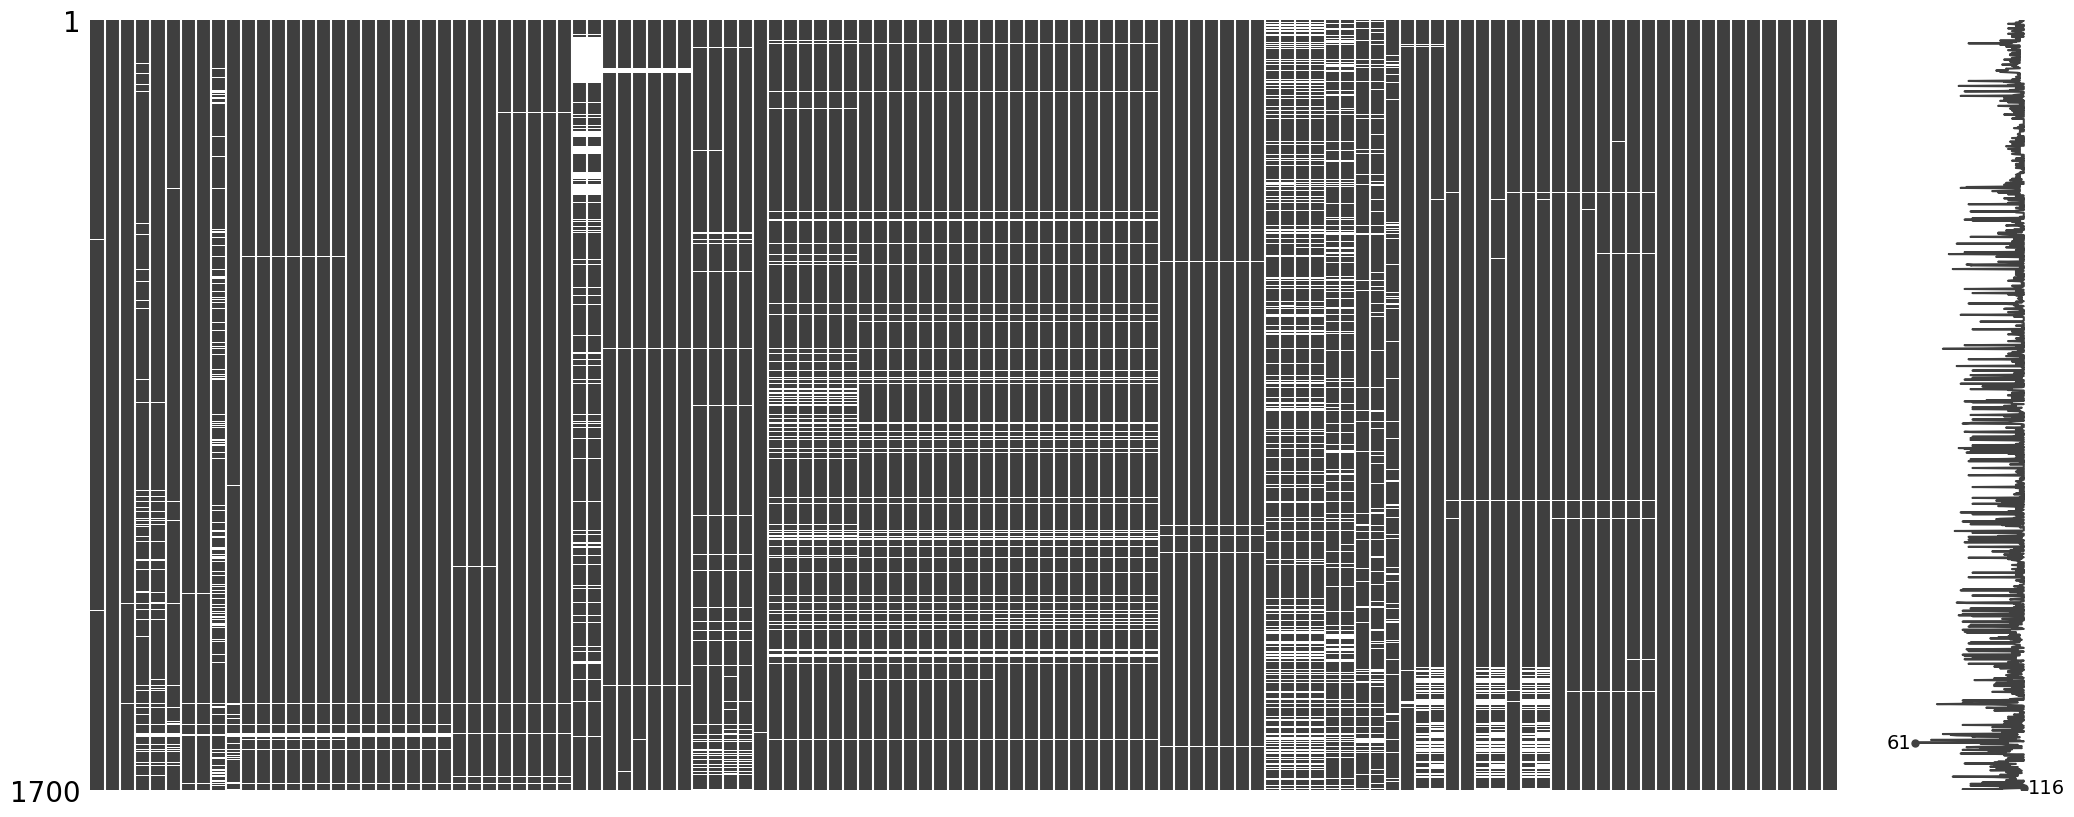

In [107]:
#missing values in the dataset
import missingno as msno
msno.matrix(df)


<AxesSubplot:>

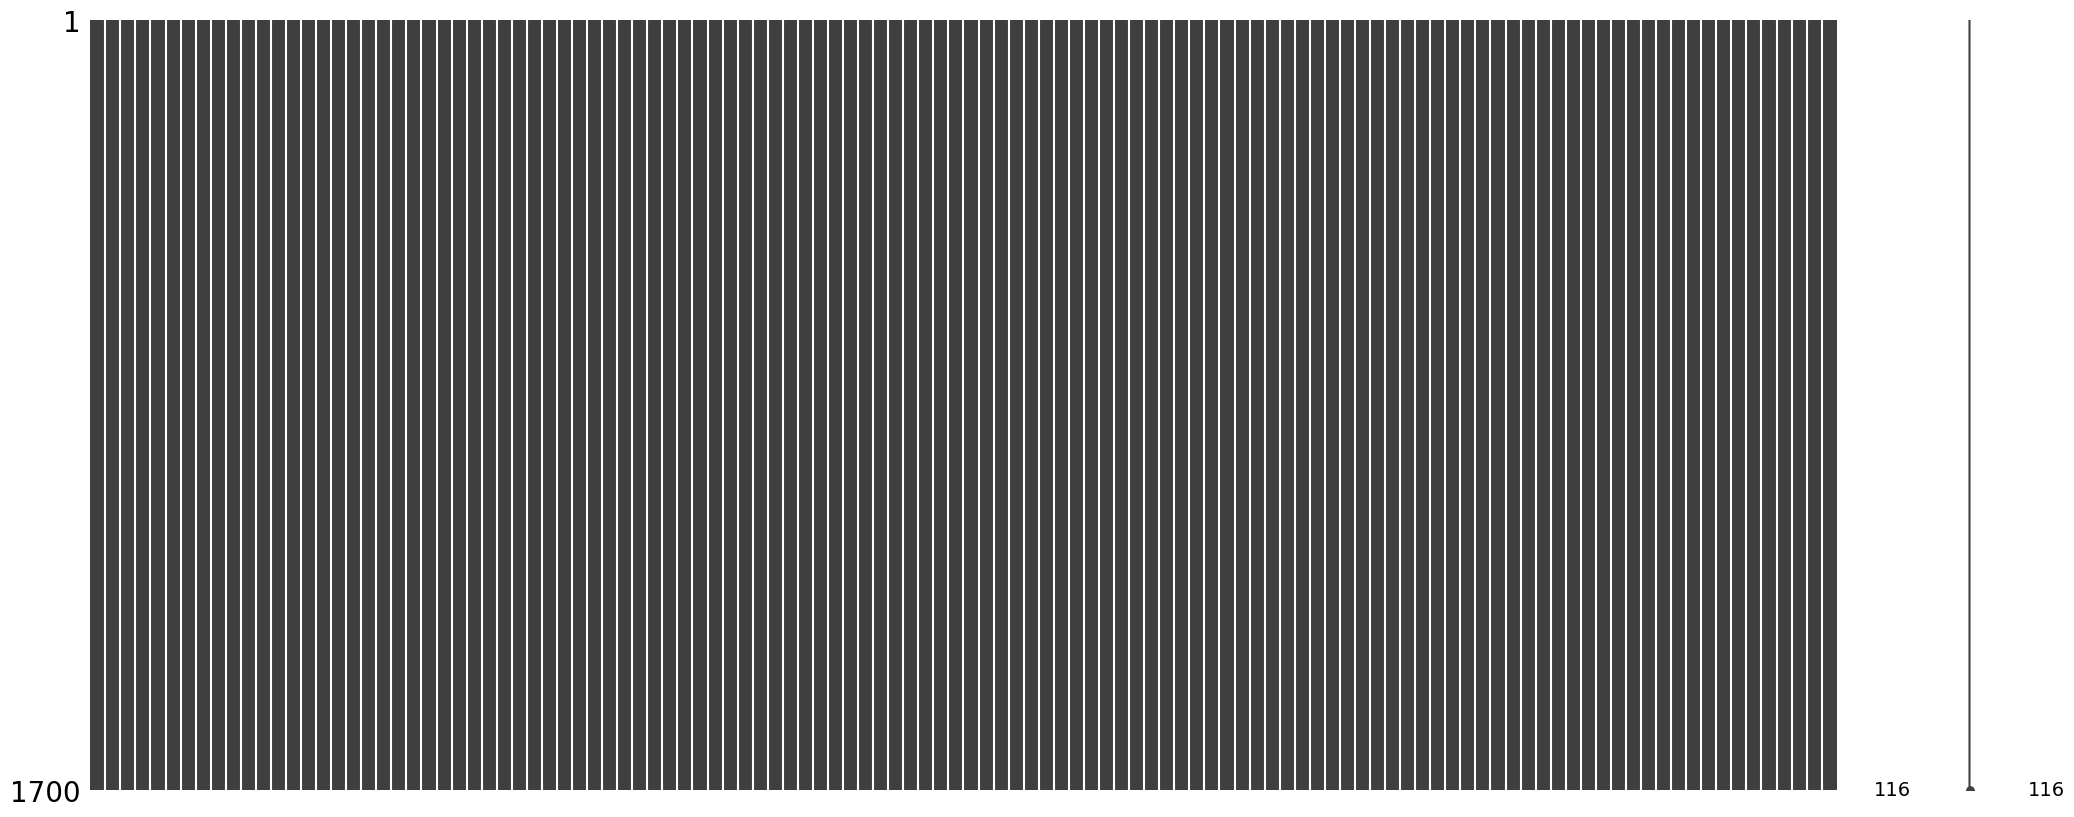

In [108]:
from collections import Counter
l_out = list(range(0,8))
for outcome in l_out:
    for col in df.columns:
        if df[col].isnull().sum()>0:
            most_freq = Counter(df.loc[df["lethal_outcome"]==outcome, [col]][col].values).most_common()[0][0]
            df[col].fillna(most_freq, inplace=True)
msno.matrix(df)

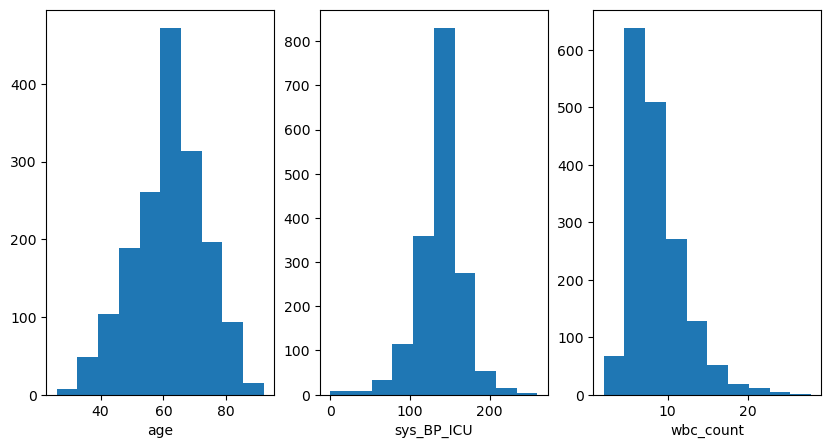

In [109]:
figure, axes = plt.subplots(1, 3, sharex=False,
                            figsize=(10, 5))
axes[0].hist(x=df["age"])
axes[0].set_xlabel('age')
axes[1].hist(x=df["sys_BP_ICU"])
axes[1].set_xlabel('sys_BP_ICU')
axes[2].hist(x=df["wbc_count"])
axes[2].set_xlabel('wbc_count')
plt.show()

<AxesSubplot:xlabel='wbc_log', ylabel='Count'>

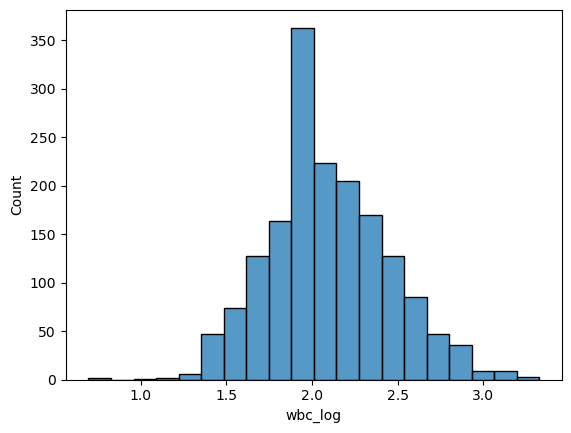

In [110]:
# transformed wbc_count column to remove skewness
df['wbc_log'] = np.log(df['wbc_count'])
sn.histplot(x=df["wbc_log"], bins = 20)

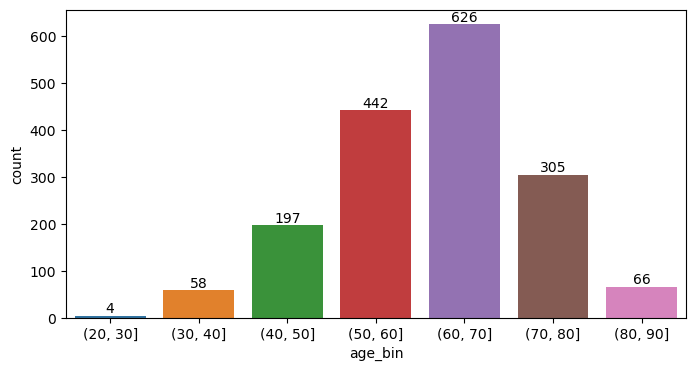

In [111]:
# define the bin edges
bins = [20, 30, 40, 50, 60, 70, 80, 90]
# bin the age column
plt.figure(figsize=(8,4))
df['age_bin'] = pd.cut(df['age'], bins)
ax = sn.countplot(x=df['age_bin'] )
for i in ax.containers:
    ax.bar_label(i,)


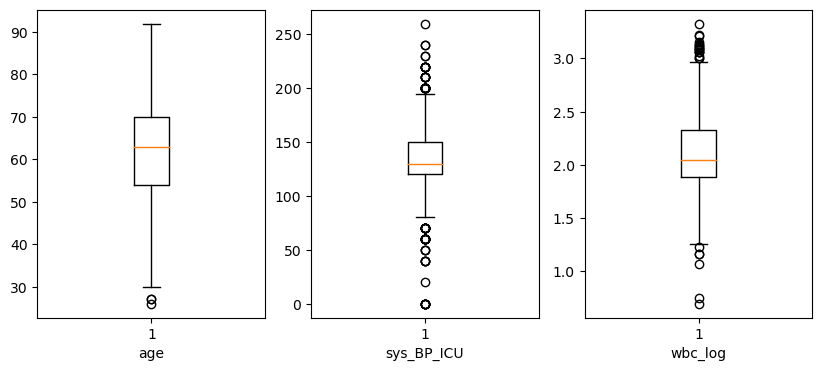

In [112]:
figure, axes = plt.subplots(1, 3, sharex=False,
                            figsize=(10, 4))
axes[0].boxplot(x=df["age"])
axes[0].set_xlabel('age')
axes[1].boxplot(x=df["sys_BP_ICU"])
axes[1].set_xlabel('sys_BP_ICU')
axes[2].boxplot(x=df["wbc_log"])
axes[2].set_xlabel('wbc_log')
plt.show()

**Data was split into catagorical and non catagorical dataframes. only data with the numerical values were normalized. later, after normalization the data was concatinated back**

In [113]:
df_new = df.drop(['age_bin','lethal_outcome','wbc_count'], axis =1)
Y = df[["lethal_outcome"]]
df_non_cat = df_new[['age', 'sys_BP_ICU', 'K_value', 'Na_value', 'ALT_level', 'AST_level',
                'ESR', 'TIME_B_S', 'wbc_log']]
df_cat = df_new.drop(['age', 'sys_BP_ICU', 'K_value', 'Na_value', 'ALT_level', 'AST_level',
                 'ESR', 'TIME_B_S', 'wbc_log'], axis = 1)

In [114]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
df_non_cat_norm = pd.DataFrame(trans.fit_transform(df_non_cat))
df_non_cat_norm.columns = df_non_cat.columns
X = pd.concat([df_non_cat_norm,df_cat], axis = 1)

In [115]:
#detecting outliers in a column and replacing outliers with most frequent per category
X['lethal_outcome'] = df['lethal_outcome']
for col in df_non_cat.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    indexes=X[col][(X[col]>upper_whisker)|(X[col]<lower_whisker)].index
    index_out = []
    for outcome in l_out:
        most_common = Counter(X.loc[X["lethal_outcome"]==outcome, [col]][col].values).most_common()[0][0]
        medi = X.loc[X["lethal_outcome"]==outcome, [col]][col].median()
        for ind in indexes:
            if X.loc[ind,'lethal_outcome'] == outcome:
                index_out.append(ind)            
        X.loc[index_out, col] = most_common

In [116]:
for col in df_cat.columns:
    least_common = Counter(X[col].values).most_common()[-1][0]
    out_ind = X.loc[(X[col]==least_common), col].index
    for outcome in l_out:
        most_common = Counter(X.loc[X["lethal_outcome"]==outcome, [col]][col].values).most_common()[0][0]
        ind_out = []
        for ind in out_ind: 
            if X.loc[ind,'lethal_outcome'] == outcome:
                ind_out.append(ind)
        if len(ind_out)/len(X.loc[X["lethal_outcome"]==outcome, [col]][col])<0.008:
            X.loc[ind_out, col] = most_common

In [117]:
X.drop('lethal_outcome', axis =1, inplace = True) 


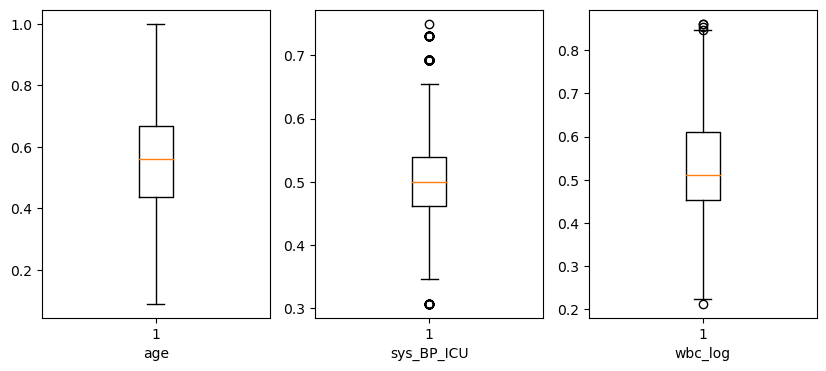

In [118]:
figure, axes = plt.subplots(1, 3, sharex=False,
                            figsize=(10, 4))
axes[0].boxplot(x=X["age"])
axes[0].set_xlabel('age')
axes[1].boxplot(x=X["sys_BP_ICU"])
axes[1].set_xlabel('sys_BP_ICU')
axes[2].boxplot(x=X["wbc_log"])
axes[2].set_xlabel('wbc_log')
plt.show()

Class=0, n=1429 (84.059%)
Class=2, n=18 (1.059%)
Class=7, n=27 (1.588%)
Class=4, n=23 (1.353%)
Class=1, n=110 (6.471%)
Class=5, n=12 (0.706%)
Class=6, n=27 (1.588%)
Class=3, n=54 (3.176%)


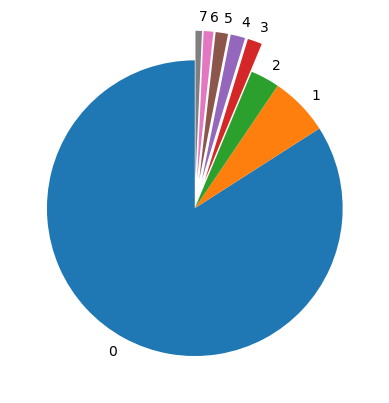

In [119]:
# summarize distribution of the target variable
counter = Counter(df.lethal_outcome)
for k,v in counter.items():
    per = v / len(df.lethal_outcome) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#pie plot showing distribution of the target varibale
mylabels = [0,1,2,3,4,5,6,7]
myexplode = [0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]
plt.pie(df.lethal_outcome.value_counts(), 
        labels = mylabels,explode = myexplode, shadow = False, startangle = 90)
plt.show() 

**Though it is good that most of the people survived, here we have an imbalanced target variable with most of the cases in category 0**
This can be delt using over sampling the minority classes and one way is
Synthetic Minority Oversampling Technique, or SMOTE for short [Nitesh Chawla, et al.,2002]

# feature selection

**chi square for catagorical features and ANNOVA for numerical features. chi2 was used to remove the catagorical features that showed low association with the target variables. ANNOVA was used for the same purpose for the numerical variables**

In [120]:
corr_mat = X.corr(method='pearson')
sorted_mat = corr_mat.unstack().sort_values()
pd.DataFrame(sorted_mat).sort_values(by = 0 ,ascending = False )


0
P_IM_STEN                      P_IM_STEN                       1.000000e+00
ch_pain                        ch_pain                         1.000000e+00
np_01                          np_01                           1.000000e+00
sys_BP_ICU                     sys_BP_ICU                      1.000000e+00
K_value                        K_value                         1.000000e+00
Na_value                       Na_value                        1.000000e+00
ALT_level                      ALT_level                       1.000000e+00
AST_level                      AST_level                       1.000000e+00
ESR                            ESR                             1.000000e+00
TIME_B_S                       TIME_B_S                        1.000000e+00
wbc_log                        wbc_log                         1.000000e+00
sex                            sex                             1.000000e+00
mi_num                         mi_num                          1.000000e+00
grade_ch_pain                  grade_ch_pain                   1.000000e+00
rytm_atr_fibr                  rytm_atr_fibr                   1.000000e+00
heart_disease_history          heart_disease_history           1.000000e+00
high_BP                        high_BP                         1.000000e+00
BP_above_180                   BP_above_180                    1.000000e+00
his_of_hbp                     his_of_hbp                      1.000000e+00
CHF_history                    CHF_history                     1.000000e+00
nr_11                          nr_11                           1.000000e+00
nr_01                          nr_01                           1.000000e+00
nr_02                          nr_02                           1.000000e+00
nr_03                          nr_03                           1.000000e+00
nr_04                          nr_04                           1.000000e+00
nr_08                          nr_08                           1.000000e+00
np_05                          np_05                           1.000000e+00
                               n_r_ecg_p_02                    1.000000e+00
mi_relapse                     mi_relapse                      1.000000e+00
chronic_pneumonia              chronic_pneumonia               1.000000e+00
age                            age                             1.000000e+00
rytm_sinus_below_60            rytm_sinus_below_60             1.000000e+00
CHF                            CHF                             1.000000e+00
np_08                          np_08                           1.000000e+00
np_10                          np_10                           1.000000e+00
diabetes_mellitus              diabetes_mellitus               1.000000e+00
obesity                        obesity                         1.000000e+00
thyrotoxicosis                 thyrotoxicosis                  1.000000e+00
chronic_bronchitis             chronic_bronchitis              1.000000e+00
obstructive_chronic_bronchitis obstructive_chronic_bronchitis  1.000000e+00
bronchial_asthma               bronchial_asthma                1.000000e+00
pulmonary_tuberculosis         pulmonary_tuberculosis          1.000000e+00
rytm_sinus_normal              rytm_sinus_normal               1.000000e+00
dia_BP_ICU                     dia_BP_ICU                      1.000000e+00
edema_ICU                      edema_ICU                       1.000000e+00
cardiogenic_shock              cardiogenic_shock               1.000000e+00
atr_rytm_irrgularity           atr_rytm_irrgularity            1.000000e+00
type_heart_rytm                type_heart_rytm                 1.000000e+00
rapid_rytm_upper_chamber       rapid_rytm_upper_chamber        1.000000e+00
vent_rytm_irregularity         vent_rytm_irregularity          1.000000e+00
lateral_MI_LV                  lateral_MI_LV                   1.000000e+00
inferior_MI_LV                 inferior_MI_LV                  1.000000e+00
posterior_MI_LV                posterior_MI_LV

In [121]:
X.drop(['rytm_atr_fibr','n_p_ecg_p_06','rythm_sinus_above_90', 'low_K', 'n_r_ecg_p_02','nr_04',
        'dia_BP_ICU','opioid_2nd_day','n_r_ecg_p_05','opioid_2nd_day','np_05'], axis = 1, inplace = True)

In [122]:
df_cat = X.drop(['age', 'sys_BP_ICU', 'K_value', 'Na_value', 'ALT_level', 'AST_level',
                     'ESR', 'TIME_B_S', 'wbc_log'], axis = 1)
df_non_cat = X[['age', 'sys_BP_ICU', 'K_value', 'Na_value', 'ALT_level', 'AST_level',
                'ESR', 'TIME_B_S', 'wbc_log']]

In [123]:
from sklearn.feature_selection import chi2
# dataframe with only catagorical variables
chi_scores = chi2(df_cat,Y)
plt.figure(figsize=(23,5))
p_values = pd.Series((chi_scores[1]),index = df_cat.columns)
p_values.sort_values(ascending = True , inplace = True)
xy = pd.DataFrame(p_values).reset_index()
xy.columns = ['feature','p_value']
xy
df_sel1 = xy[xy['p_value']<0.05]
df_sel1.feature.tolist()
df_new = df[df_sel1.feature.tolist()]
df_new.shape

(1700, 61)

<Figure size 2300x500 with 0 Axes>

Feature 0: 8.524215
Feature 1: 5.812445
Feature 2: 2.556720
Feature 3: 0.751739
Feature 4: 1.416027
Feature 5: 0.379001
Feature 6: 0.565376
Feature 7: 4.327987
Feature 8: 4.683960


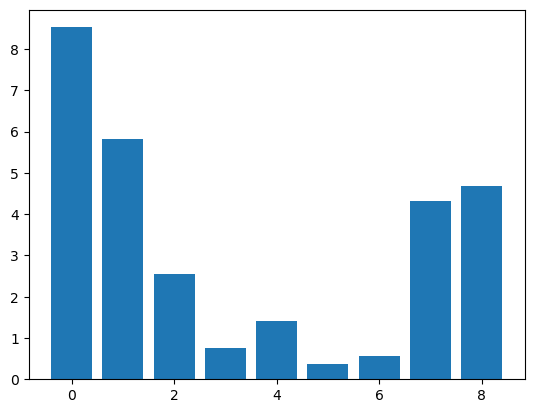

Index(['age', 'sys_BP_ICU', 'K_value', 'Na_value', 'ALT_level', 'AST_level',
       'ESR', 'TIME_B_S', 'wbc_log'],
      dtype='object')

In [124]:
# ANOVA f_test feature selection on numerical variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
def select_features(X_train, y_train, X_test):
 # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
    fs.fit(X_train, y_train)
 # transform train input data
    X_train_fs = fs.transform(X_train)
 # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_non_cat, Y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
df_non_cat.columns

**The two three features that can be significant in terms of association with the target variable are sys_BP_ICU, age and wbc count**

In [125]:
# Data frame with statistically selected features (cat + num)
X = pd.concat([df_non_cat[['sys_BP_ICU','age','wbc_log']],df_new], axis =1)
X.shape

(1700, 64)

**In the following step I used random forest with default parameters to find feature importance**

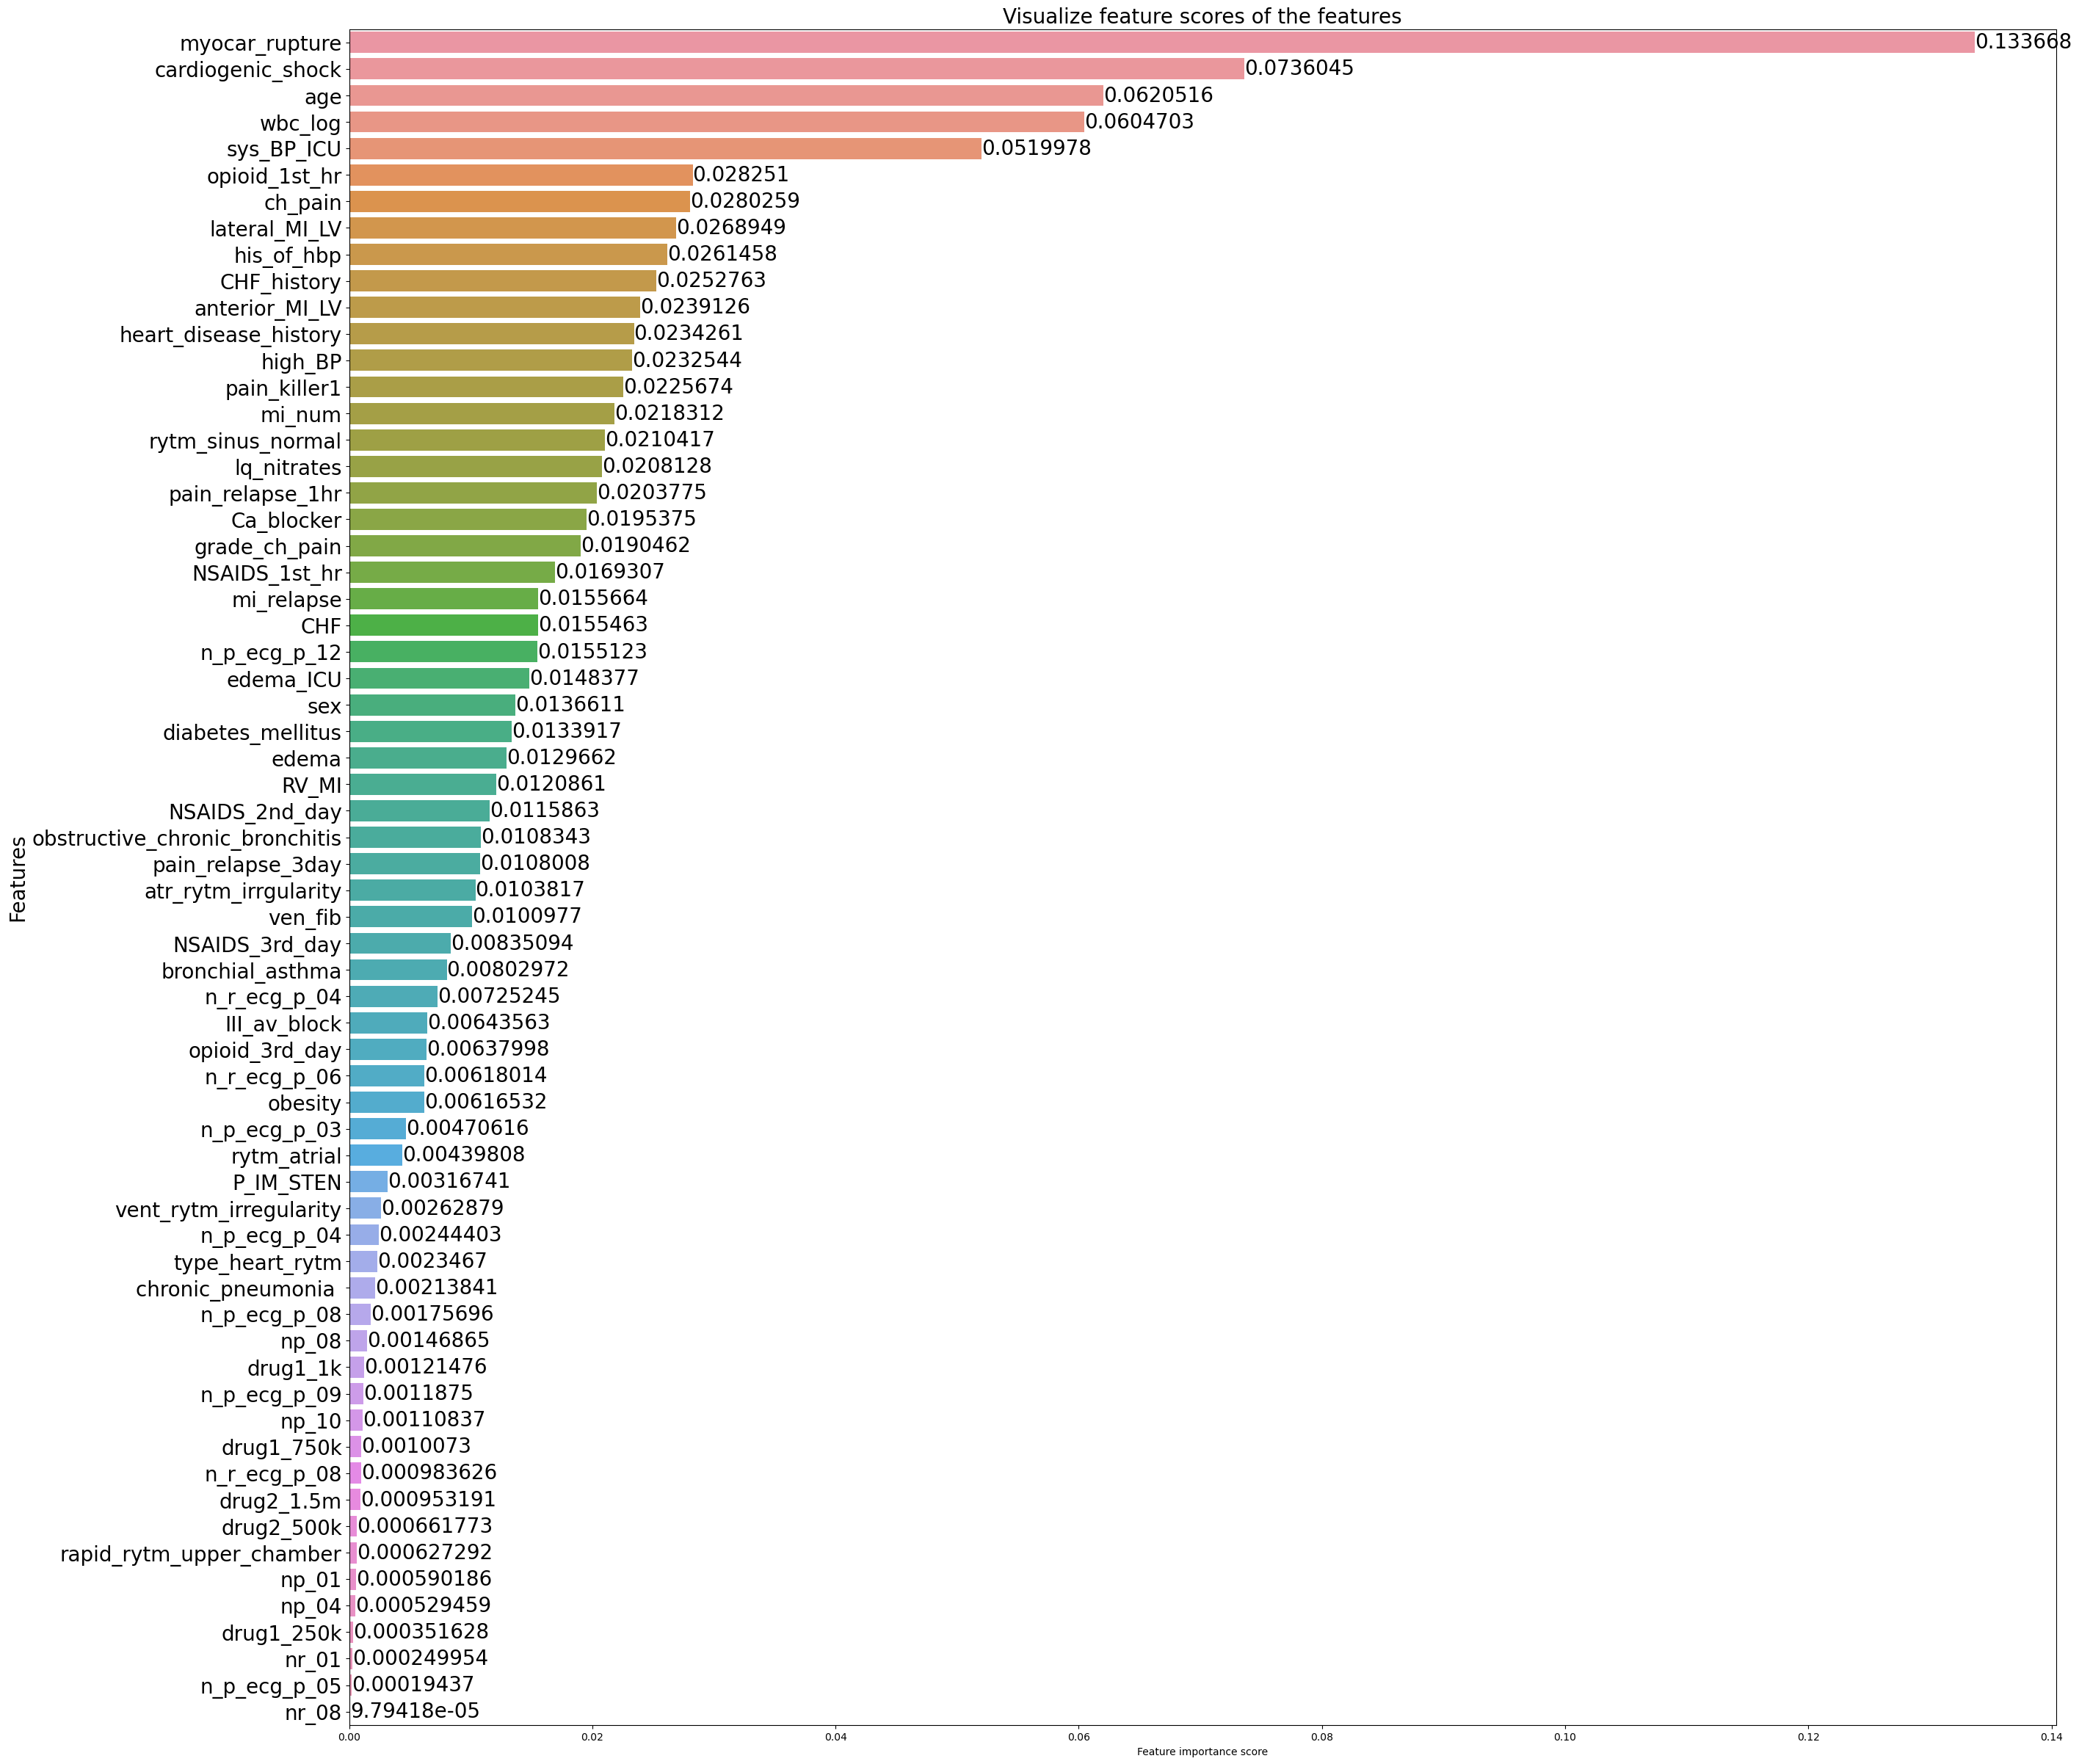

64


In [126]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state = 42)
model.fit(X,Y)

#dataframe with two columns:feature and feature score
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
df_features = feature_scores.to_frame().reset_index() 
df_features.columns = ["feature","feature_score"]

# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 30))
ax = sn.barplot(x=feature_scores, y=feature_scores.index, data=df_features)
ax.set_title("Visualize feature scores of the features", fontsize = 20)
ax.set_yticklabels(feature_scores.index, fontsize = 20)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features",fontsize = 20)
ax.bar_label(ax.containers[0], fontsize = 20)
plt.show()
print(len(df_features.feature))

**the correlation values were calculated between the columns and the target varibale using .corr() and the values were sorted in the descending order**

In [127]:
#selecting top features
imp_feat = df_features.loc[:58]
X_fsel = X[imp_feat.feature.tolist()]
CORR = []
for col in list(X_fsel.columns):
    CORR.append(X_fsel[col].corr(df['lethal_outcome']))
feat = list(X_fsel.columns)
corr_with_class = pd.DataFrame(feat)
corr_with_class['corr'] = [abs(value) for value in CORR]
corr_with_class.columns = ['feat','corr']
sel = corr_with_class.sort_values(by = 'corr', ascending = False)[:58]
sel.feat.tolist()


['myocar_rupture',
 'ven_fib',
 'lq_nitrates',
 'rytm_sinus_normal',
 'age',
 'CHF_history',
 'n_p_ecg_p_12',
 'atr_rytm_irrgularity',
 'obstructive_chronic_bronchitis',
 'wbc_log',
 'edema_ICU',
 'heart_disease_history',
 'opioid_1st_hr',
 'anterior_MI_LV',
 'n_r_ecg_p_06',
 'pain_relapse_3day',
 'mi_relapse',
 'P_IM_STEN',
 'bronchial_asthma',
 'pain_killer1',
 'RV_MI',
 'ch_pain',
 'sex',
 'grade_ch_pain',
 'cardiogenic_shock',
 'high_BP',
 'lateral_MI_LV',
 'pain_relapse_1hr',
 'n_p_ecg_p_08',
 'mi_num',
 'NSAIDS_3rd_day',
 'diabetes_mellitus',
 'NSAIDS_2nd_day',
 'his_of_hbp',
 'NSAIDS_1st_hr',
 'type_heart_rytm',
 'n_r_ecg_p_04',
 'vent_rytm_irregularity',
 'III_av_block',
 'sys_BP_ICU',
 'Ca_blocker',
 'opioid_3rd_day',
 'n_r_ecg_p_08',
 'rytm_atrial',
 'CHF',
 'obesity',
 'np_10',
 'n_p_ecg_p_03',
 'np_01',
 'drug1_1k',
 'rapid_rytm_upper_chamber',
 'drug2_500k',
 'chronic_pneumonia ',
 'edema',
 'drug1_750k',
 'n_p_ecg_p_04',
 'n_p_ecg_p_09',
 'np_08']

# feature engineering
**We mearged the two columns with edema, one recorded in the ICU and othe ras the complication of the myocardial infraction to make one single column**

In [128]:
#merging edema and edema_ICU
print(X_fsel['edema_ICU'].value_counts())



0.0    1590
1.0     110
Name: edema_ICU, dtype: int64


In [129]:
test = []
for i in list(range(0,len(X_fsel['edema']))):
    if (X_fsel['edema'].tolist())[i]==0:
        if (X_fsel['edema_ICU'].tolist())[i]==1:
            test.append(1)
        else:
            test.append(0)
        
    else:
        test.append(1)
X_fsel['edema_mrg']=test

In [130]:
X_fsel.columns

Index(['myocar_rupture', 'cardiogenic_shock', 'age', 'wbc_log', 'sys_BP_ICU',
       'opioid_1st_hr', 'ch_pain', 'lateral_MI_LV', 'his_of_hbp',
       'CHF_history', 'anterior_MI_LV', 'heart_disease_history', 'high_BP',
       'pain_killer1', 'mi_num', 'rytm_sinus_normal', 'lq_nitrates',
       'pain_relapse_1hr', 'Ca_blocker', 'grade_ch_pain', 'NSAIDS_1st_hr',
       'mi_relapse', 'CHF', 'n_p_ecg_p_12', 'edema_ICU', 'sex',
       'diabetes_mellitus', 'edema', 'RV_MI', 'NSAIDS_2nd_day',
       'obstructive_chronic_bronchitis', 'pain_relapse_3day',
       'atr_rytm_irrgularity', 'ven_fib', 'NSAIDS_3rd_day', 'bronchial_asthma',
       'n_r_ecg_p_04', 'III_av_block', 'opioid_3rd_day', 'n_r_ecg_p_06',
       'obesity', 'n_p_ecg_p_03', 'rytm_atrial', 'P_IM_STEN',
       'vent_rytm_irregularity', 'n_p_ecg_p_04', 'type_heart_rytm',
       'chronic_pneumonia ', 'n_p_ecg_p_08', 'np_08', 'drug1_1k',
       'n_p_ecg_p_09', 'np_10', 'drug1_750k', 'n_r_ecg_p_08', 'drug2_1.5m',
       'drug2_500k', 

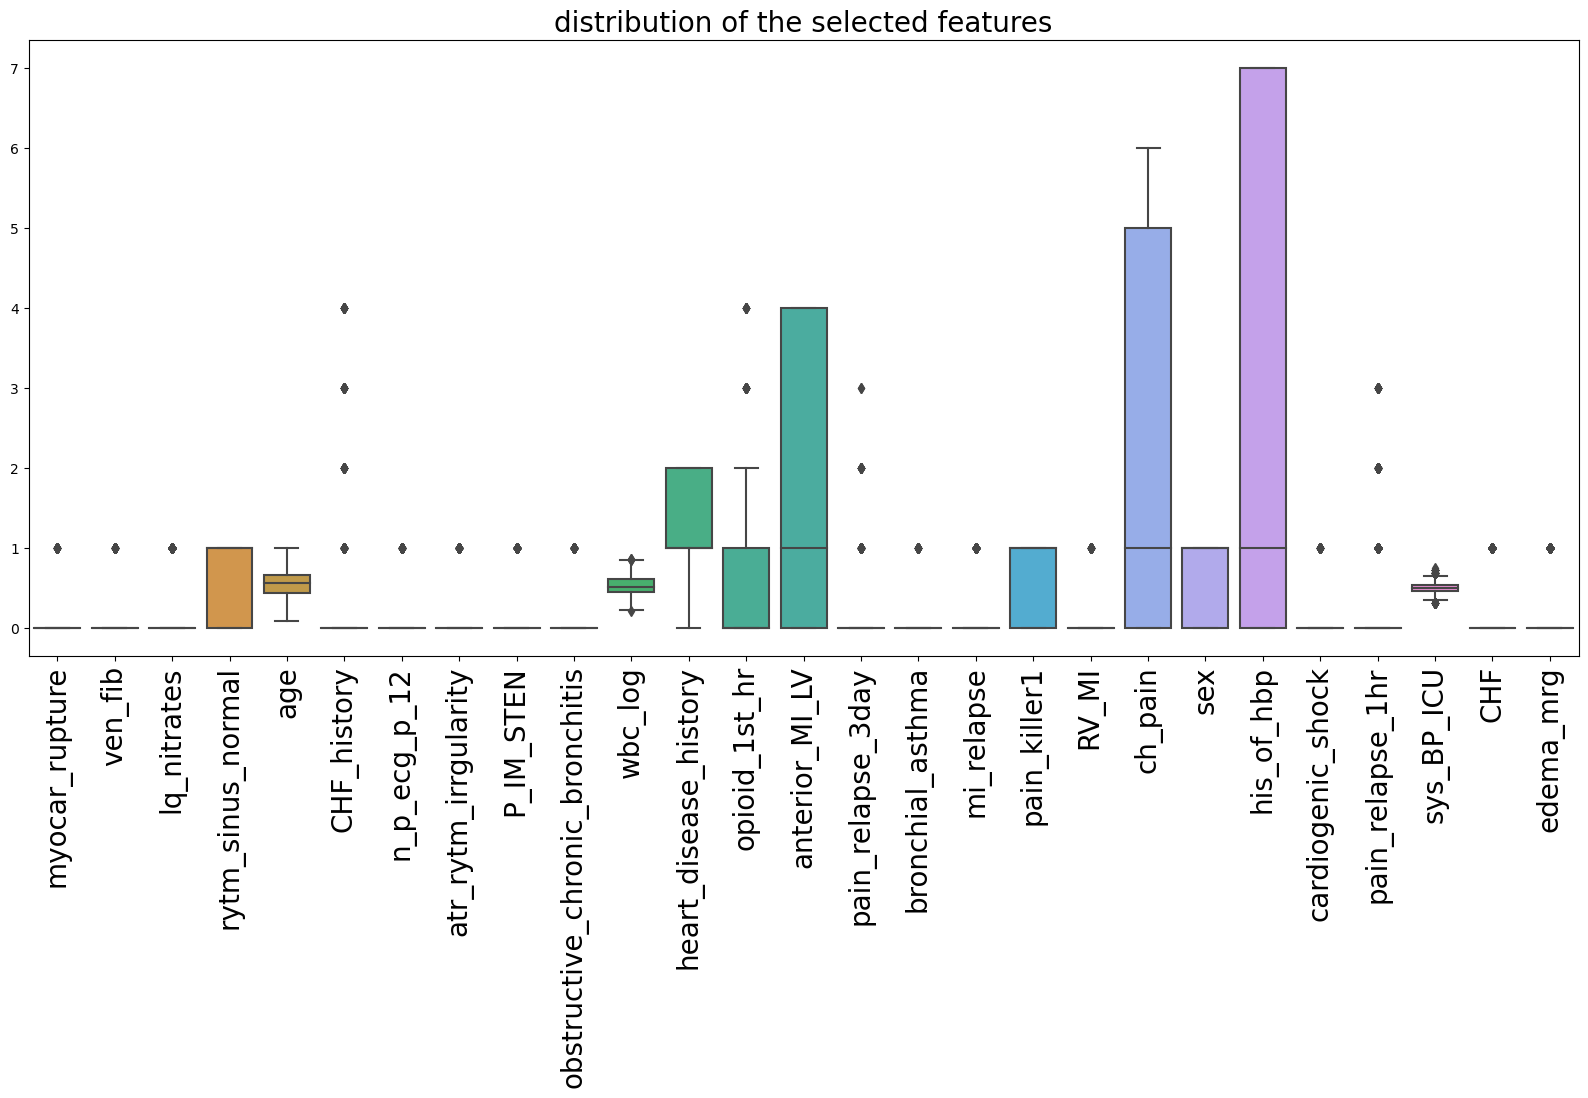

(1700, 27)

In [131]:
#dropping columns based on the correation with the target variable and feedback from the model section


selected = X_fsel[['myocar_rupture', 'ven_fib', 'lq_nitrates', 'rytm_sinus_normal', 'age',
                   'CHF_history', 'n_p_ecg_p_12', 'atr_rytm_irrgularity', 'P_IM_STEN',
                   'obstructive_chronic_bronchitis', 'wbc_log', 'heart_disease_history',
                   'opioid_1st_hr', 'anterior_MI_LV', 'pain_relapse_3day','bronchial_asthma',
                   'mi_relapse', 'pain_killer1', 'RV_MI', 'ch_pain', 'sex', 'his_of_hbp',
                   'cardiogenic_shock', 'pain_relapse_1hr', 'sys_BP_ICU', 'CHF',
                   'edema_mrg']]


plt.figure(figsize=(20, 8))
sn.boxplot(data=selected)
plt.xticks(rotation=90,fontsize=20)
plt.title('distribution of the selected features',fontsize=20)
plt.show()

selected.shape

# model building
**We begin with oversampling using SMOTE to deal with the imbalance in the dataset**

In [132]:
#oversampling to balance the data imbalance
oversample = SMOTE()
x_train1, x_test, y_train1, y_test = train_test_split(selected, Y, test_size=0.20,stratify=Y, random_state=42)
x_train, y_train = oversample.fit_resample(x_train1, y_train1)


In [133]:
# weight per class to be used for weighted models
wt = []
for i in list(range(1,9)):
    wt.append((len(df['lethal_outcome'])/df.loc[df['lethal_outcome']==(i-1), 'lethal_outcome'].value_counts())/100)
wt

[0    0.011896
 Name: lethal_outcome, dtype: float64,
 1    0.154545
 Name: lethal_outcome, dtype: float64,
 2    0.944444
 Name: lethal_outcome, dtype: float64,
 3    0.314815
 Name: lethal_outcome, dtype: float64,
 4    0.73913
 Name: lethal_outcome, dtype: float64,
 5    1.416667
 Name: lethal_outcome, dtype: float64,
 6    0.62963
 Name: lethal_outcome, dtype: float64,
 7    0.62963
 Name: lethal_outcome, dtype: float64]

# model building

**logistic regression**

Accuracy   : 0.679
f1_score: 0.3920864790049966
recall_score:  [0.6993007  0.40909091 0.5        1.         0.8        0.5
 0.6        0.2       ]


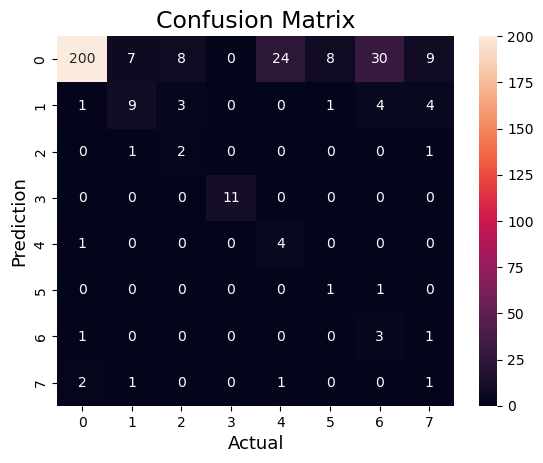

In [134]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='lbfgs', random_state = 42)
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred, average=None)
f1_lr = f1_score(y_test, y_pred, average= 'macro')
print("Accuracy   :", round(accuracy_lr, 3))
print("f1_score:", f1_lr)
print('recall_score: ', recall_lr)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Note: weights were manually fine tuned to get a better classifier

**SVM**

f1_score: 0.4253208454024729
Accuracy   : 0.768
recall_score:  [0.8041958 0.5       0.5       1.        0.8       0.5       0.2
 0.2      ]


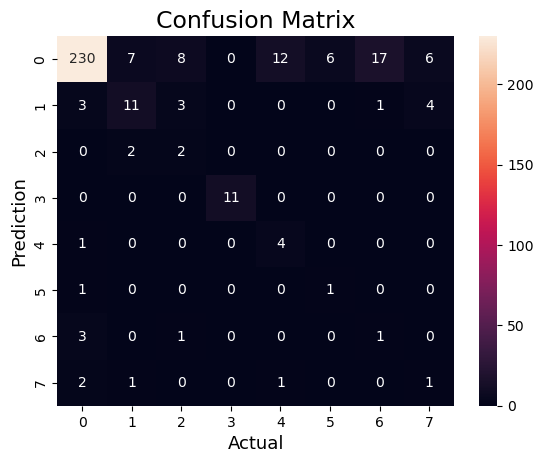

In [139]:
from sklearn.svm import SVC
# define model
weights2 = {0:0.95, 1:0.8, 2:0.95, 3:0.32, 4:0.77, 5:1.43, 6:0.62, 7:0.62}
model_svm = SVC(kernel='linear',gamma='auto', 
                   decision_function_shape='ovr', random_state=42, class_weight = weights2)
model_svm.fit(np.array(x_train),np.array(y_train).flatten())
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred, average=None)
f1_svm = f1_score(y_test, y_pred, average= 'macro')
print("f1_score:", f1_svm)
print("Accuracy   :", round(accuracy_svm, 3))
print('recall_score: ', recall_svm)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       286
           1       0.50      0.50      0.50        22
           2       0.14      0.50      0.22         4
           3       1.00      1.00      1.00        11
           4       0.22      0.80      0.35         5
           5       0.12      0.50      0.20         2
           6       0.05      0.20      0.08         5
           7       0.09      0.20      0.13         5

    accuracy                           0.76       340
   macro avg       0.39      0.56      0.42       340
weighted avg       0.88      0.76      0.81       340



In [137]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test , y_pred,
                                average='macro'))
from sklearn.metrics import f1_score

(0.38607694682906546, 0.5612762237762238, 0.41761858654006334, None)


**KNN**

f1_score: 0.2353457252941789
Accuracy   : 0.803
recall_score:  [0.91258741 0.36363636 0.         0.27272727 0.         0.
 0.         0.2       ]


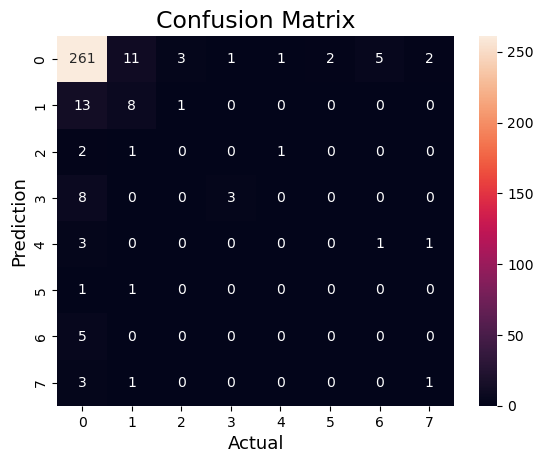

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2, weights = 'distance', metric='manhattan')
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred, average=None)
f1_knn = f1_score(y_test, y_pred, average= 'macro')
print("f1_score:", f1_knn)
print("Accuracy   :", round(accuracy_knn, 3))
print('recall_score: ', recall_knn)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


**Random forest Classifer**

f1_score:  0.31646961110025407
Accuracy   : 0.897
recall_score:  [0.99300699 0.45454545 0.         1.         0.         0.
 0.         0.        ]


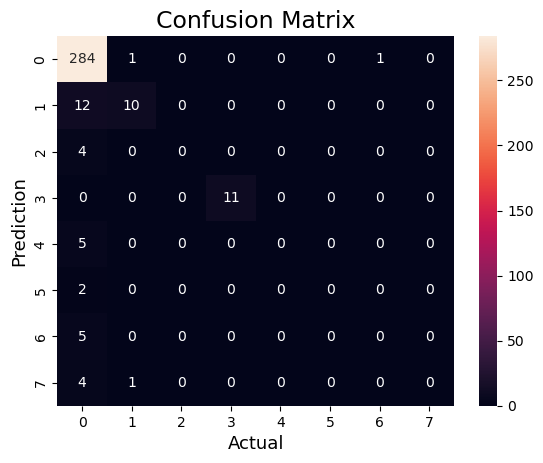

g_mean : 0.0


In [43]:
from sklearn.ensemble import RandomForestClassifier

# define the reference model
model_rf = RandomForestClassifier(n_estimators=250,random_state=42)
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred, average=None)
f1_rf = f1_score(y_test, y_pred, average= 'macro')
print("f1_score: ",f1_rf)
print("Accuracy   :", round(accuracy_rf, 3))
print('recall_score: ', recall_rf)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
g_mean_rf = geometric_mean_score(y_test, y_pred)
print('g_mean :' ,g_mean_rf)

**weigted/cost sensitive random forest classifier**


f1_score: 0.3374967418457886
Accuracy   : 0.635
recall_score:  [0.67482517 0.27272727 0.75       0.45454545 1.         0.5
 0.4        0.2       ]


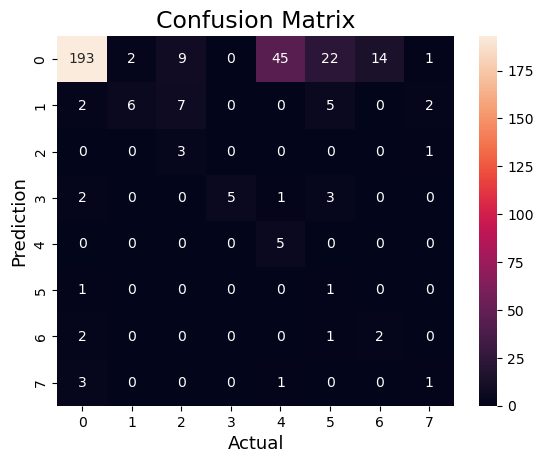

In [44]:
from imblearn.metrics import geometric_mean_score
# for loop to find the best value for max_samples based on g_mean score
max_samp = []
g_mean = []
for i in list(range(5, 40)):

    model_rf_wg = RandomForestClassifier(n_estimators=250, max_samples = i, class_weight = weights2,
                                         max_features = None, random_state=42)
    model_rf_wg.fit(x_train,y_train)
    y_pred = model_rf_wg.predict(x_test)
    accuracy_rf_wg = accuracy_score(y_test, y_pred)
    recall_rf_wg = recall_score(y_test, y_pred, average=None)
    f1_rf_wg = f1_score(y_test, y_pred, average= 'macro')
    g_mean.append(geometric_mean_score(y_test, y_pred))
    max_samp.append(i)
    

max_samples_value = max_samp[g_mean.index(max(g_mean))] # find i where g_mean is maximum
model_rf_wt = RandomForestClassifier(n_estimators=250, max_samples = max_samples_value,class_weight = weights2,
                                         max_features = None, random_state=42)
model_rf_wt.fit(x_train,y_train)
y_pred = model_rf_wt.predict(x_test)
accuracy_rf_wt = accuracy_score(y_test, y_pred)
recall_rf_wt = recall_score(y_test, y_pred, average=None)
f1_rf_wt = f1_score(y_test, y_pred, average= 'macro')
print("f1_score:", f1_rf_wt)
print("Accuracy   :", round(accuracy_rf_wt, 3))
print('recall_score: ', recall_rf_wt)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


**XGBooster Classfier**

f1_score: 0.3092669228495418
Accuracy   : 0.888
[0.98601399 0.40909091 0.         1.         0.         0.
 0.         0.        ]


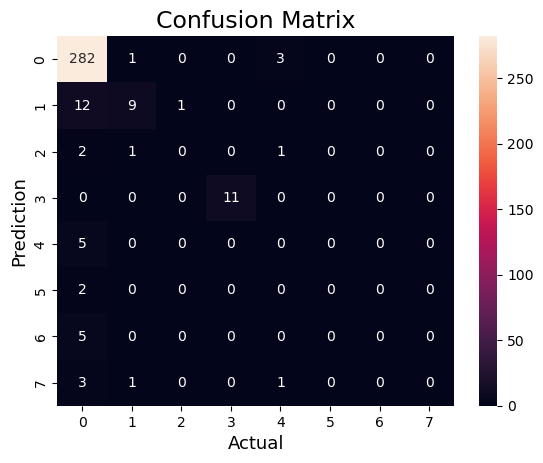

In [45]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(objective='multi:softmax',n_estimators=50, random_state = 42)
model_xg.fit(x_train,y_train)
model_xg.fit(x_train,y_train)
y_pred = model_xg.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred)
recall_xg = recall_score(y_test, y_pred, average=None)
f1_xg = f1_score(y_test, y_pred, average= 'macro')
print("f1_score:", f1_xg)
print("Accuracy   :", round(accuracy_xg, 3))
print(recall_xg)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


**bagging with logistic classifier (model_lr) as  the base estimator**

f1_score: 0.3648884587380181
Accuracy   : 0.644
[0.66433566 0.36363636 0.5        1.         0.8        0.5
 0.4        0.2       ]


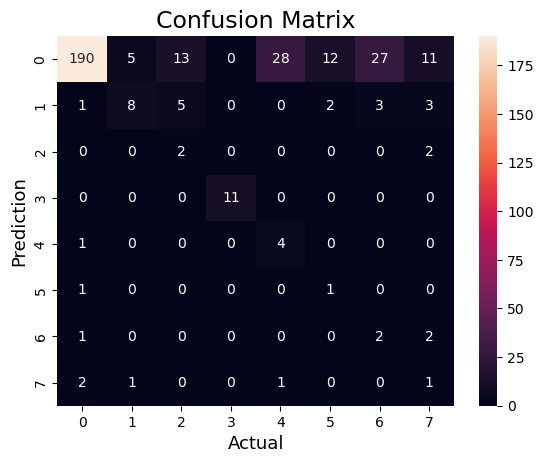

In [46]:
from sklearn.ensemble import BaggingClassifier
model_bagg_lr = BaggingClassifier(base_estimator= model_lr, max_samples = 800,
                               n_estimators=100, random_state = 42)
model_bagg_lr.fit(x_train,y_train)
y_pred = model_bagg_lr.predict(x_test)
accuracy_bagg_lr = accuracy_score(y_test, y_pred)
recall_bagg_lr = recall_score(y_test, y_pred, average=None)
f1_bagg_lr = f1_score(y_test, y_pred, average= 'macro')
print("f1_score:", f1_bagg_lr)
print("Accuracy   :", round(accuracy_bagg_lr, 3))
print(recall_bagg_lr)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


**bagging with model_svm as  the base estimator**

f1_score: 0.40402468195029817
Accuracy   : 0.741
[0.76923077 0.54545455 0.5        1.         0.8        0.5
 0.2        0.2       ]


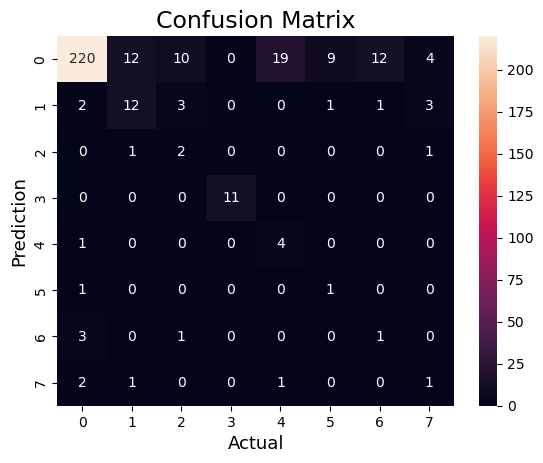

In [47]:
model_bagg_svm = BaggingClassifier(base_estimator= model_svm, max_samples = 800,
                               n_estimators=100, random_state = 42)
model_bagg_svm.fit(x_train,y_train)
y_pred = model_bagg_svm.predict(x_test)
accuracy_bagg_svm = accuracy_score(y_test, y_pred)
recall_bagg_svm = recall_score(y_test, y_pred, average=None)
f1_bagg_svm = f1_score(y_test, y_pred, average= 'macro')
print("f1_score:", f1_bagg_svm)
print("Accuracy   :", round(accuracy_bagg_svm, 3))
print(recall_bagg_svm)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


**bagging with weghted random forest (model_rf_wt) as  the base estimator**

f1_score: 0.20353392178339022
Accuracy   : 0.576
[0.65034965 0.         0.25       0.63636364 0.4        0.
 0.         0.        ]


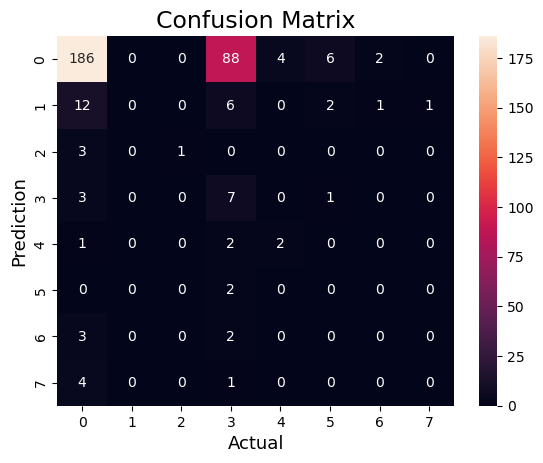

In [48]:
model_bagg_wt_rf = BaggingClassifier(base_estimator= model_rf_wt, max_samples = 850,
                               n_estimators=50, random_state = 42)
model_bagg_wt_rf.fit(x_train,y_train)
y_pred = model_bagg_wt_rf.predict(x_test)
accuracy_bagg_wt_rf = accuracy_score(y_test, y_pred)
recall_bagg_wt_rf = recall_score(y_test, y_pred, average=None)
f1_bagg_wt_rf = f1_score(y_test, y_pred, average= 'macro')
print("f1_score:", f1_bagg_wt_rf)
print("Accuracy   :", round(accuracy_bagg_wt_rf, 3))
print(recall_bagg_wt_rf)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


f1_score: 0.40984452194129617
Accuracy   : 0.824
[0.88111888 0.54545455 0.25       1.         0.6        0.
 0.         0.2       ]


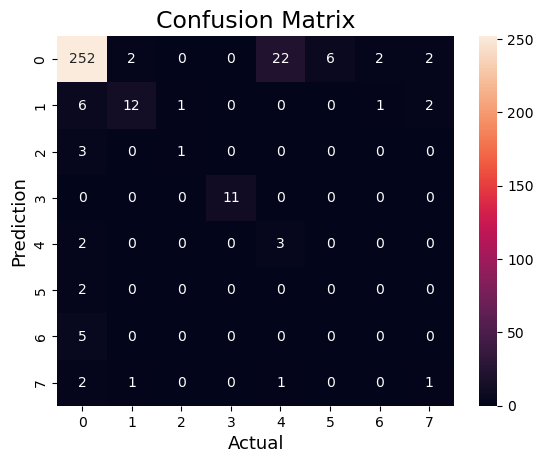

In [49]:
from xgboost import XGBClassifier
model_bagg_xg = BaggingClassifier(base_estimator= XGBClassifier(objective='multi:softmax',random_state = 42),
                                  max_samples = 650,n_estimators=50, random_state = 42)
model_bagg_xg.fit(x_train,y_train)
y_pred = model_bagg_xg.predict(x_test)
accuracy_bagg_xg = accuracy_score(y_test, y_pred)
recall_bagg_xg = recall_score(y_test, y_pred, average=None)
f1_bagg_xg = f1_score(y_test, y_pred, average= 'macro')
print("f1_score:", f1_bagg_xg)
print("Accuracy   :", round(accuracy_bagg_xg, 3))
print(recall_bagg_xg)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [50]:
#In other words, recall measures the model's ability to identify all instances of a particular class

d = {'lr': recall_lr, 'svm': recall_svm, 'knn':recall_knn, 'rf':recall_rf, 'rf_wt':recall_rf_wt,'xg':recall_xg,
    'bagg_lr':recall_bagg_lr,'bagg_svm':recall_bagg_svm, 'bagg_wt_rf':recall_bagg_wt_rf, 'bagg_xg': recall_bagg_xg}
f1_scores = [f1_lr,f1_svm, f1_knn, f1_rf, f1_rf_wt,f1_xg,f1_bagg_lr,f1_bagg_svm,f1_bagg_wt_rf,f1_bagg_xg]


In [51]:
models = ['log_reg','svm','knn','rand_forest','wt_rf','xgbooster','bagg_lr','bagg_svm','bagg_wt_rf','bagg_xg']
f1_macro = pd.DataFrame(models)
f1_macro['scores'] = f1_scores
f1_macro.columns = ['model','f1_score']
f1_sorted = f1_macro.sort_values(by=['f1_score'])

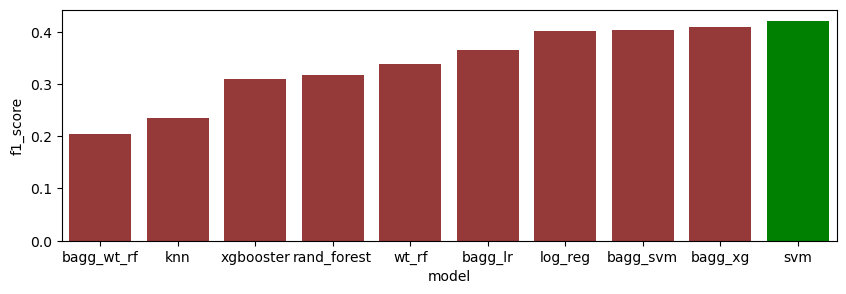

In [52]:
fig = plt.figure(figsize = (10, 3))
ax = sn.barplot(data=f1_sorted, x='model', y='f1_score', color='brown')

patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('green')  

plt.show()

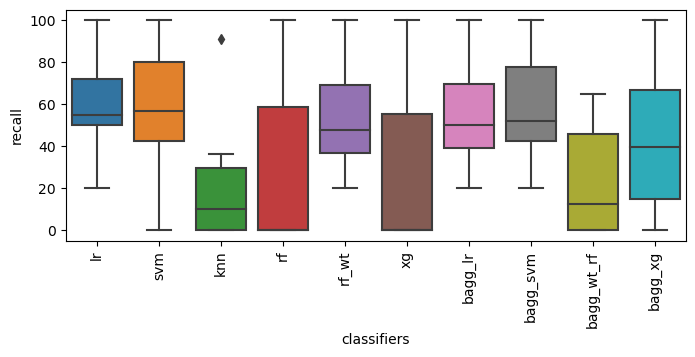

In [53]:
# plot of recall vector for the different models. A recall is a vector with model efficiency per class as elements
results = pd.DataFrame(d)
result = round(results*100, 2)
result['data_percentage'] = df.lethal_outcome.value_counts()*100/len(df.lethal_outcome)
result.sort_values(by = 'data_percentage', ascending=False)
plt.figure(figsize = (8,3))
sn.boxplot(data = result.iloc[:,:10])
plt.xlabel("classifiers", fontsize = 10)
plt.ylabel("recall", fontsize = 10)
plt.xticks(rotation = 90)
plt.show()
# lower range 0 means the classifier cannot predict one or more classes from the dataset

# Conclusion: 
1) one new features was engineered by merging edema and edema history.  
2) finally number of columns used for modeling is 27  
3) SVM was found to have highest F1_score (around 43) and accuracy around 77%. So, we chose SVM for deployment. 

In [54]:
import pickle
pickle.dump(model_svm, open('model.pkl','wb'))


In [55]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict(x_test))

[0 0 0 0 0 7 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 1 0 4 0 0 7 0 0
 0 3 0 0 0 2 1 0 0 6 0 0 0 0 0 0 6 0 2 0 4 0 0 6 0 0 0 0 6 5 0 1 0 4 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 3 0 1 5 7 4 0 0 0 0 0 1 0 0 0 0 6 5 0
 0 0 0 0 6 0 0 3 0 0 4 0 6 3 3 0 0 4 0 3 1 3 0 0 0 0 0 0 4 0 0 0 1 2 0 0 0
 2 0 0 0 0 0 4 4 0 1 0 6 0 0 0 0 0 6 0 0 0 0 0 0 0 1 0 3 0 0 0 0 1 0 0 0 0
 4 0 0 0 0 6 7 0 0 0 0 1 0 6 0 0 0 0 3 0 5 0 0 1 0 0 0 0 0 4 6 1 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 4 2 0 1 0 0 0 2 0 1 0 1 6 4 0 1 0 4 6 0 1 0 7 6 0 0 2 0
 1 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 6 3 0 0 5 0 0 1 0 0 0 0 0 0 2 6 6 1 0 4 0 0 2 1 7 0 0 1 6 0 0 0 0 0
 0 2 0 0 0 0 4]
